### application 데이터 셋에 다양한 feature engineering 수행
- application_train(train) 주요 feature 값들의 분포도등의 EDA 수행
- application_test(test) 주요 feature 들의 추가적인 가공을 통한 feature engineering 수행

In [1]:
# data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os, sys
import random

from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [2]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [3]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 연속형 숫자 feature들에 대해서 TARGET 값이 각각 0과 1일때의 histogram 시각화 
- violineplot과 distplot으로 숫자형 feature들에 대해 TARGET값 별 분포도 비교 시각화

In [5]:
num_columns = app_train.dtypes[app_train.dtypes != 'object']
print(num_columns)

SK_ID_CURR                        int64
TARGET                            int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64


In [6]:
def show_hist_by_target(df, columns):
    cond_1 = (df['TARGET'] == 1)
    cond_0 = (df['TARGET'] == 0)
    
    for col in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x='TARGET', y=col, data=df, ax=axs[0][0])
        sns.distplot(df[cond_1][col], ax=axs[0][1], label=1, color='red')
        sns.distplot(df[cond_0][col], ax=axs[0][1], label=0, color='blue')

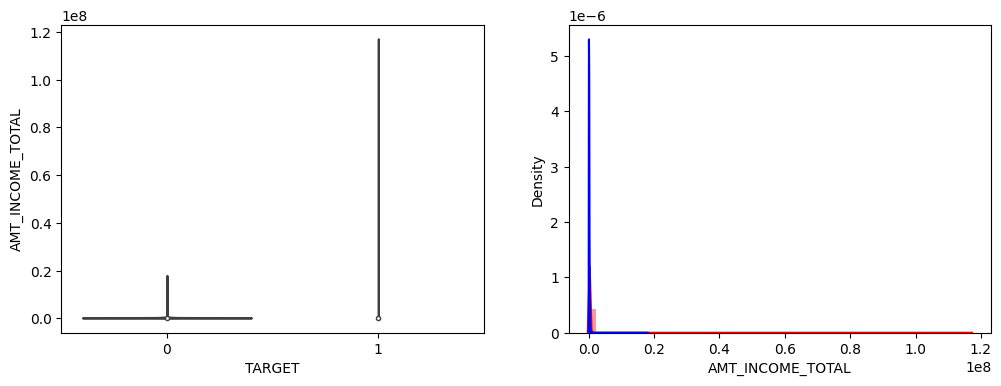

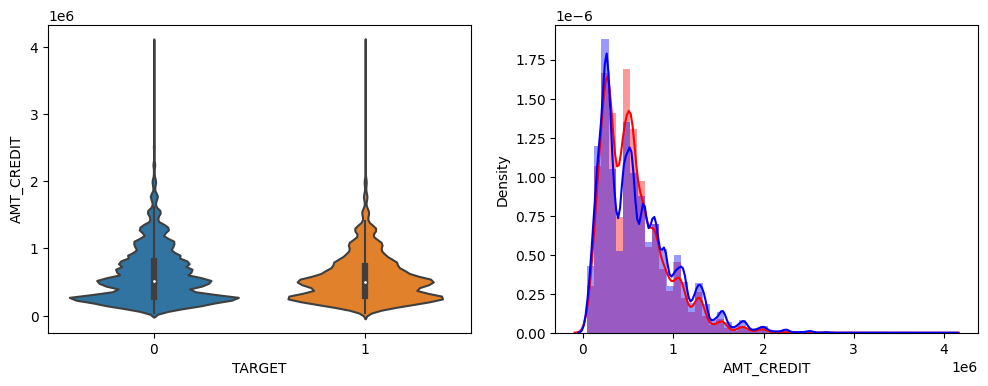

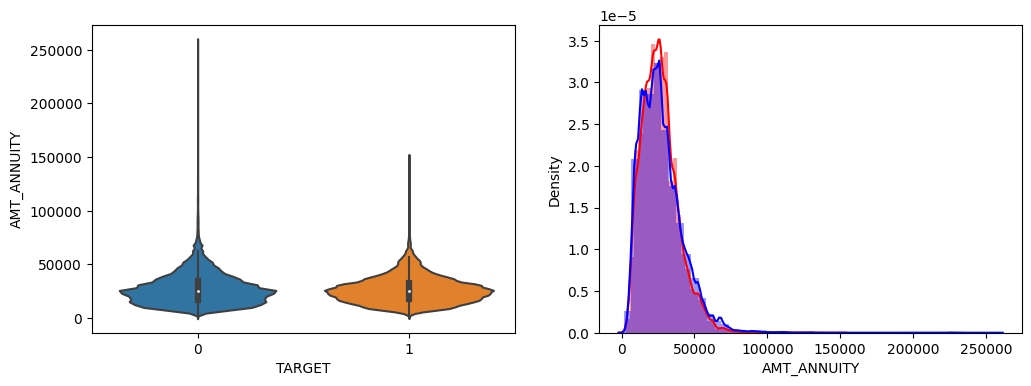

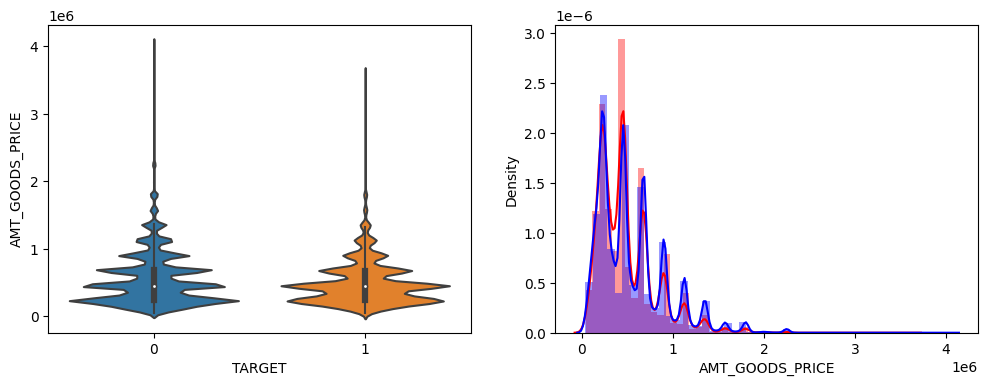

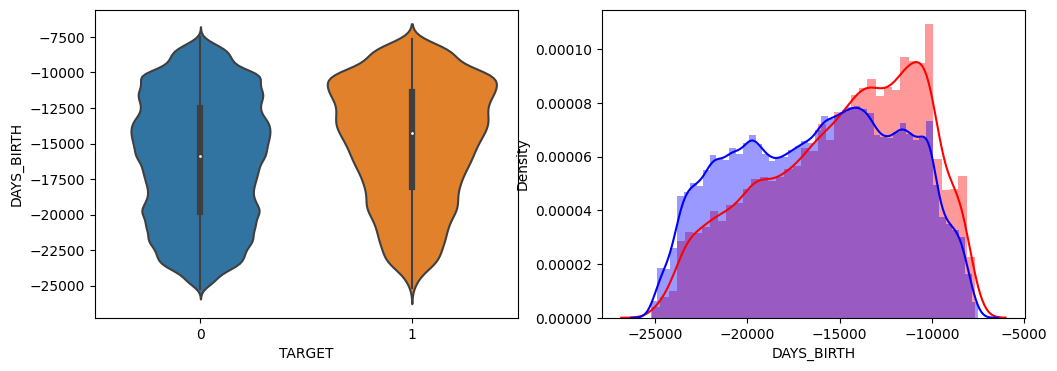

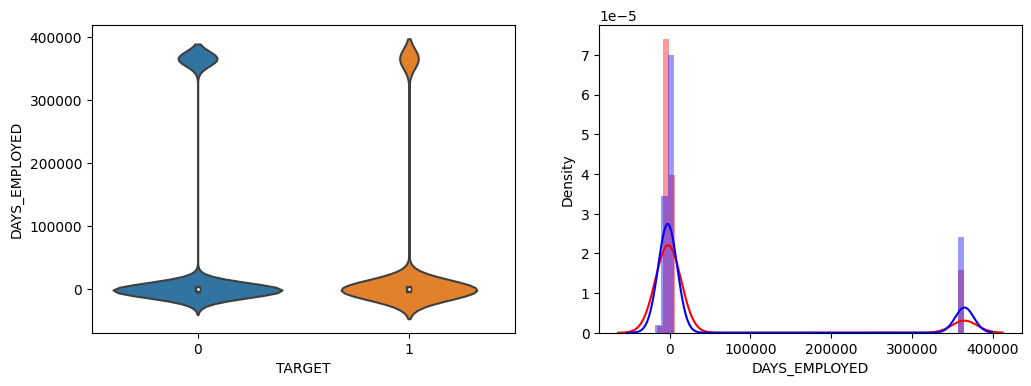

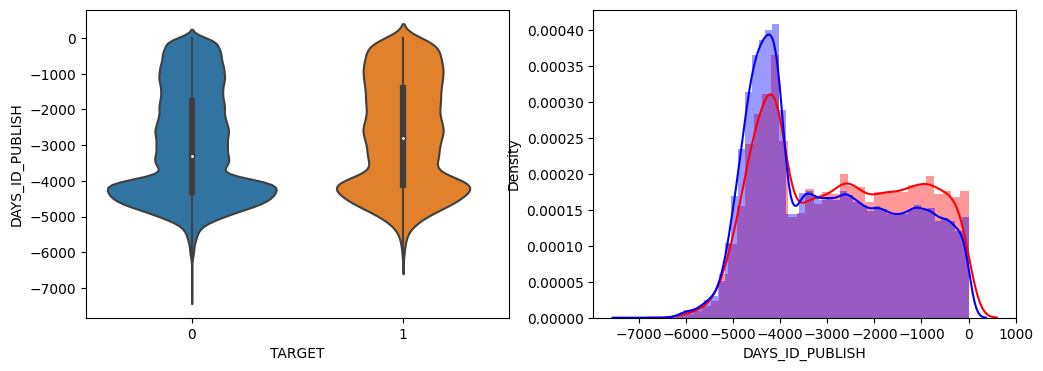

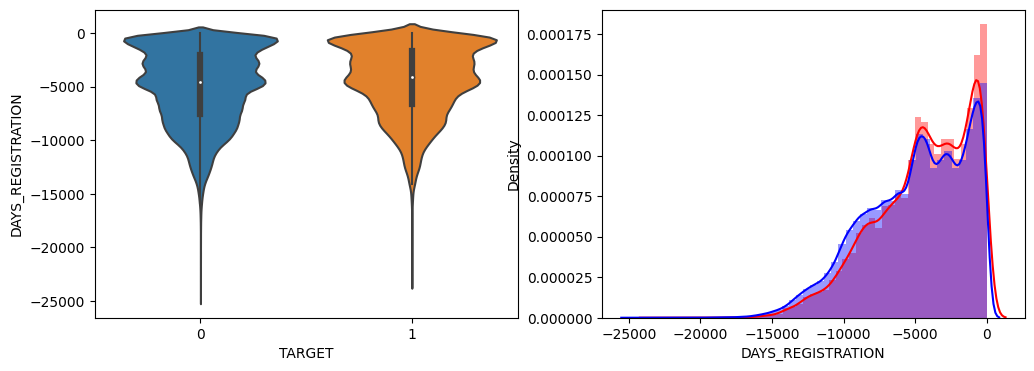

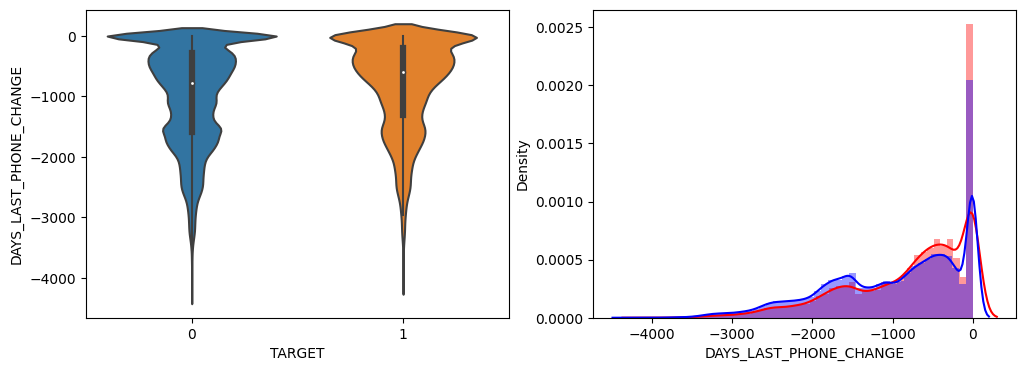

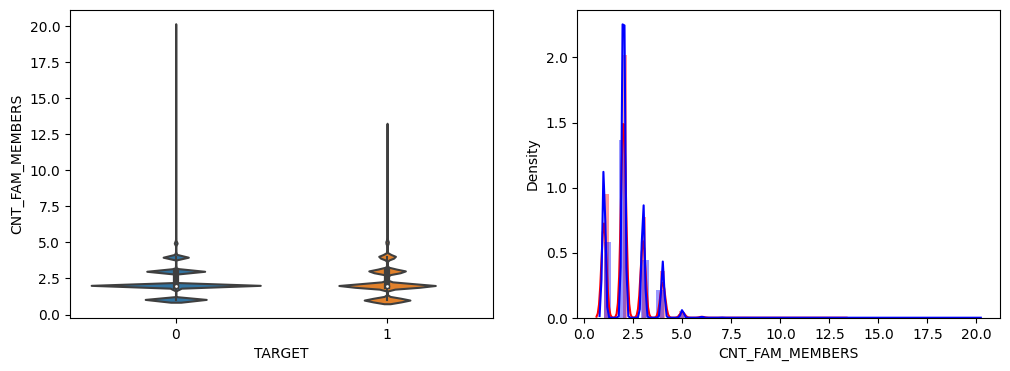

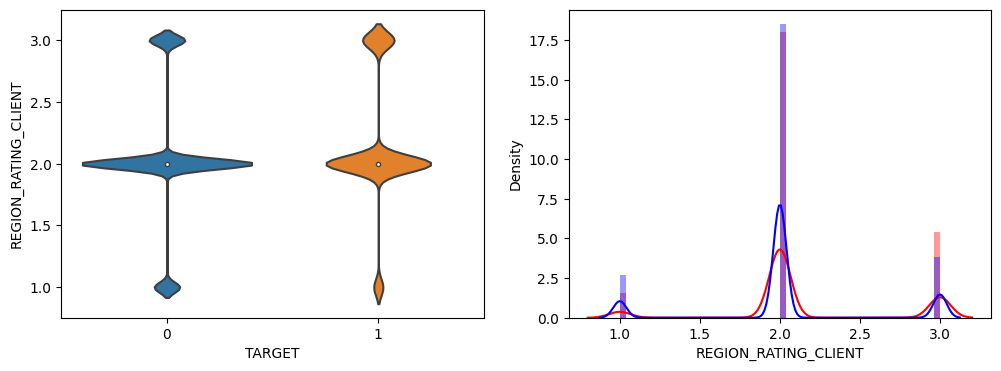

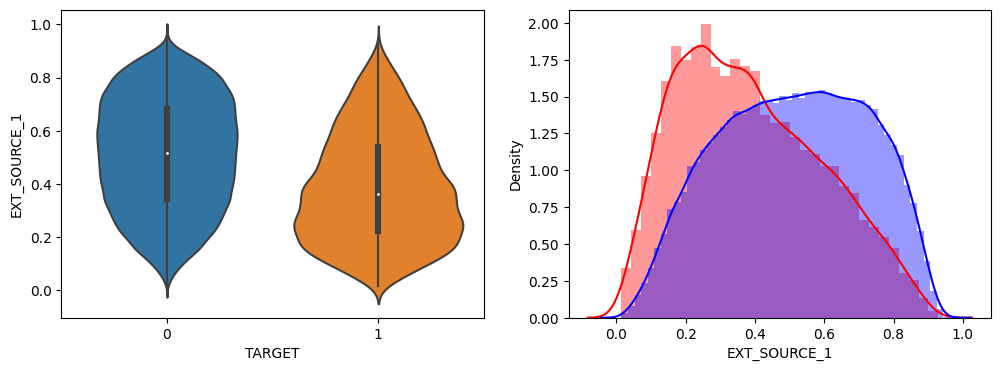

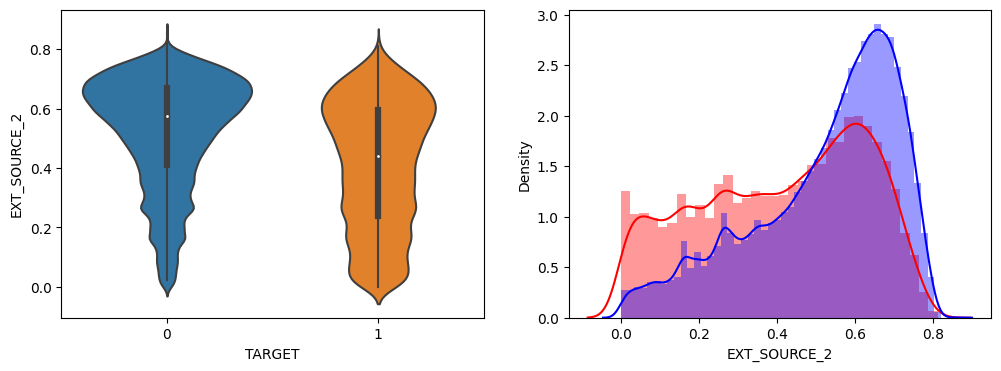

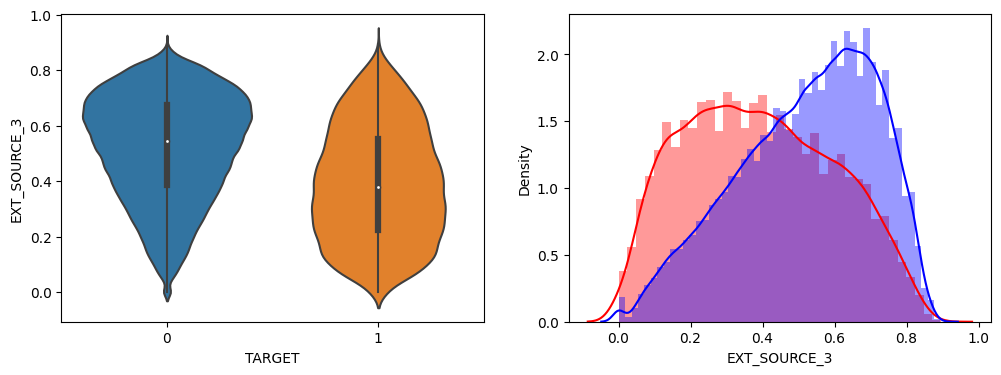

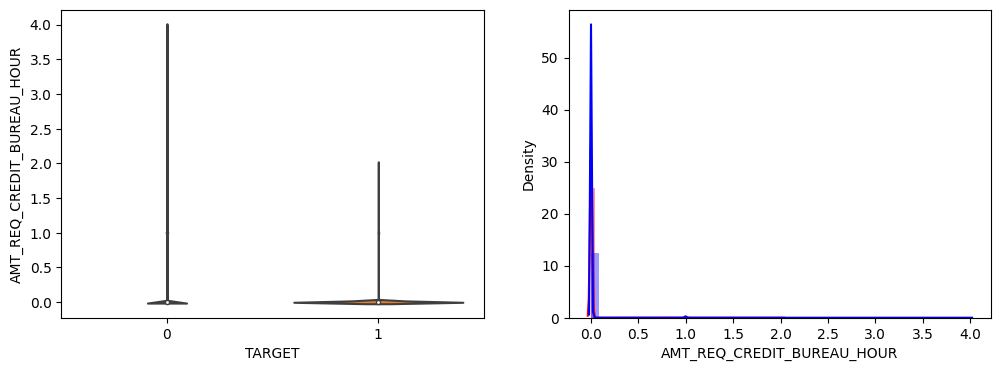

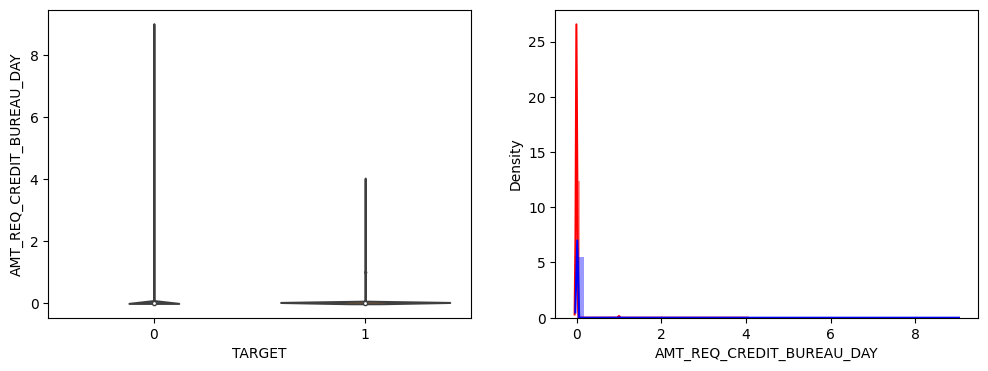

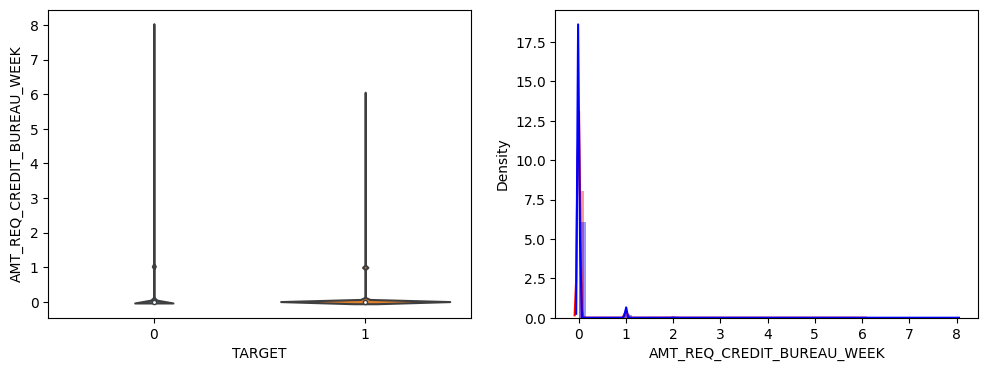

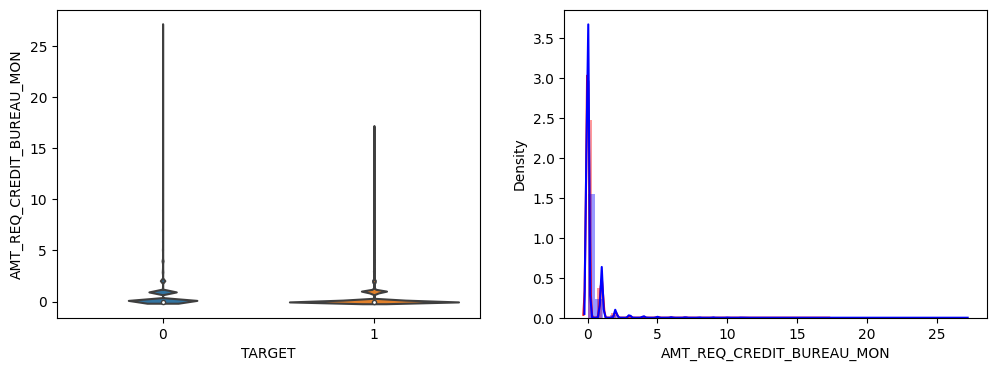

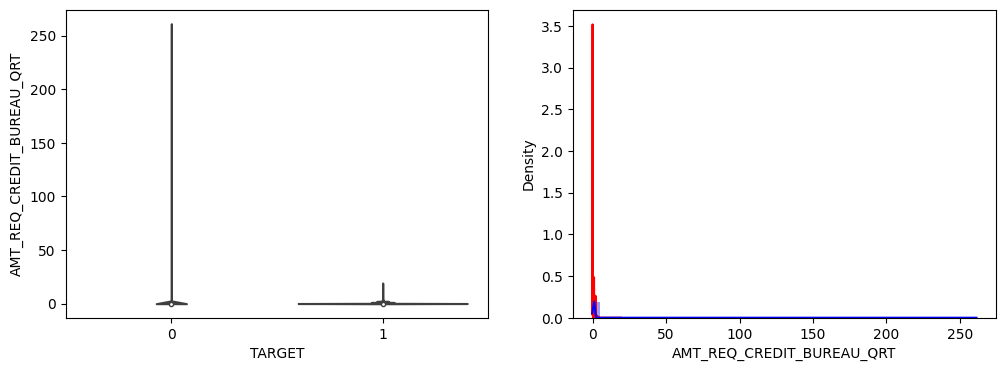

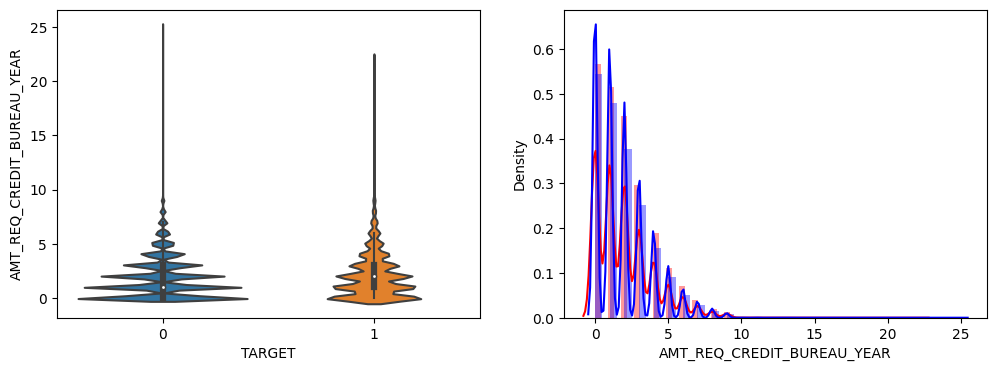

In [7]:
columns =  ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

show_hist_by_target(app_train, columns)

* AMT_INCOME_TOTAL, AMT_CREDIT 은 크게 차이가 없음. 
* AMT_ANNUITY는 TARGET=1시 상대적으로 작은 숫자대의 값이 조금 많음. 
* AMT_GOOD_PRICE는 크게 차이가 없음. 
* DAYS_BIRTH는 TARGET=1시 적은 연령대의 숫자값이 상대적으로 많음. 
* DAYS_EMPLOYED는 TARGET=1시 작은 값들이 조금 더 많음. 
* DAYS_ID_PUBLISH, DAYS_REGISTRATION  는 TARGET=1시 최근 값들이 조금 더 많음. 
* DAYS_LAST_PHONE_CHANGE는 큰 차이 없음. 
* CNT_FAM_MEMBERS는 차이가 없음. outlier 때문에 histogram에 차이가 있어 보임. 
* REGION_RATING_CLIENT는 큰 차이 없음 
* EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 모두 조금씩 차이가 있음.  
* 나머지 컬럼모두 큰 차이가 없음. 
* 전반적으로 연령대가 낮은(직장 경력이 적은), 소액 대출에서 상대적으로 연체 비중이 높음.  

### seaborn의 countplot() 또는 catplot()을 이용하여 category feature(object 칼럼)을 TARGET 유형에 따라 count 비교

In [9]:
object_columns = app_train.dtypes[app_train.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [15]:
cond_1 = (app_train['TARGET'] == 1)
cond_0 = (app_train['TARGET'] == 0)
    

KeyError: 0

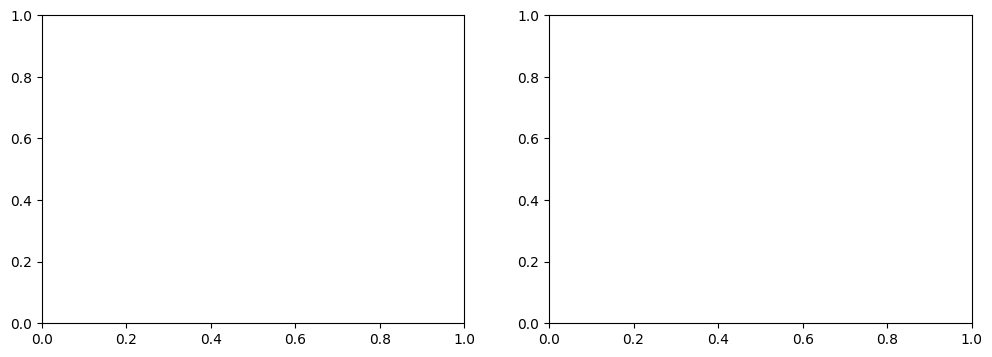

In [21]:
def show_count_by_target(df, columns):
    cond_1 = (df['TARGET'] == 1)
    cond_0 = (df['TARGET'] == 0)
    
    for col in columns:
        fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
        sns.countplot(df[cond_0][col], ax=axs[0][0])
        sns.countplot(df[cond_1][col], ax=axs[0][1])
        
show_count_by_target(app_train, object_columns)

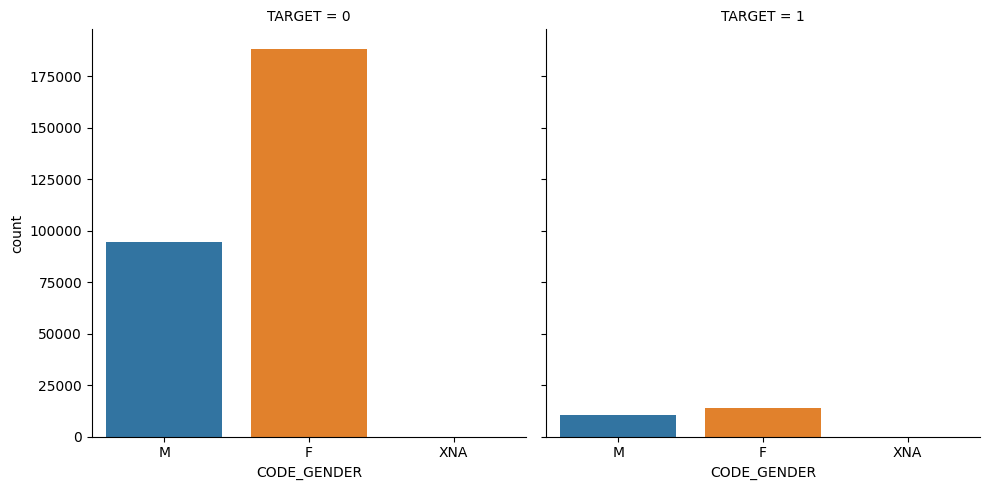

In [23]:
sns.catplot(x='CODE_GENDER', col='TARGET', data=app_train, kind='count')
# 카테고리에 따라 색깔이 달라지고, XNA가 한쪽엔 있고, 한쪽엔 없었더라도 펼쳐져서 생김
# 단, 단점은 TARGET=0이 스케일이 커서 스케일이 작은 것이 너무 작게 보이는 단점

column name: NAME_CONTRACT_TYPE
column name: CODE_GENDER
column name: FLAG_OWN_CAR
column name: FLAG_OWN_REALTY
column name: NAME_TYPE_SUITE
column name: NAME_INCOME_TYPE
column name: NAME_EDUCATION_TYPE
column name: NAME_FAMILY_STATUS
column name: NAME_HOUSING_TYPE
column name: OCCUPATION_TYPE
column name: WEEKDAY_APPR_PROCESS_START
column name: ORGANIZATION_TYPE
column name: FONDKAPREMONT_MODE
column name: HOUSETYPE_MODE
column name: WALLSMATERIAL_MODE
column name: EMERGENCYSTATE_MODE


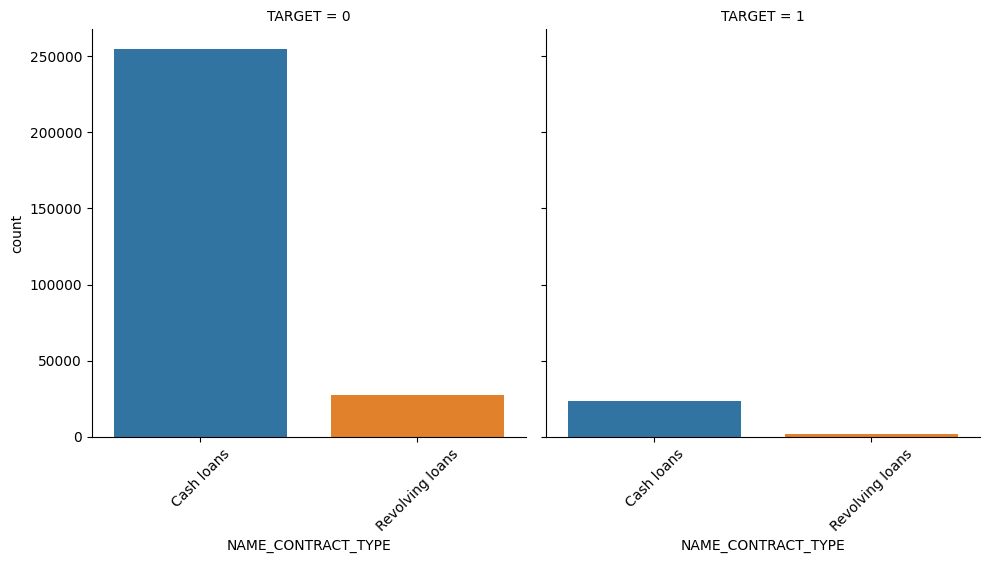

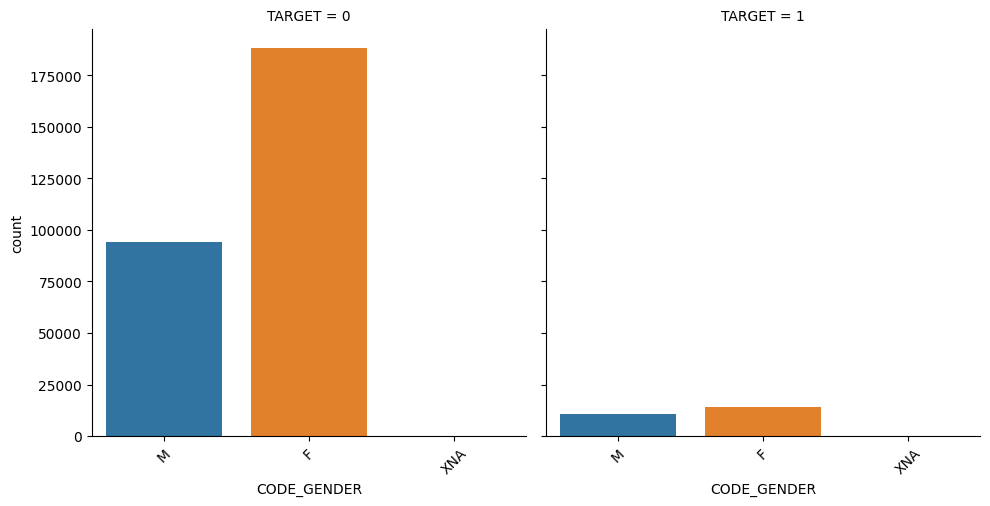

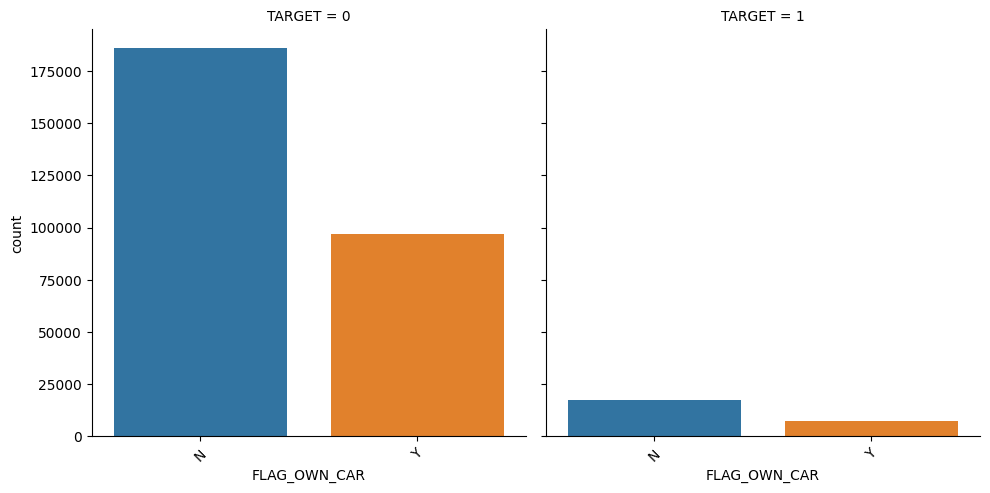

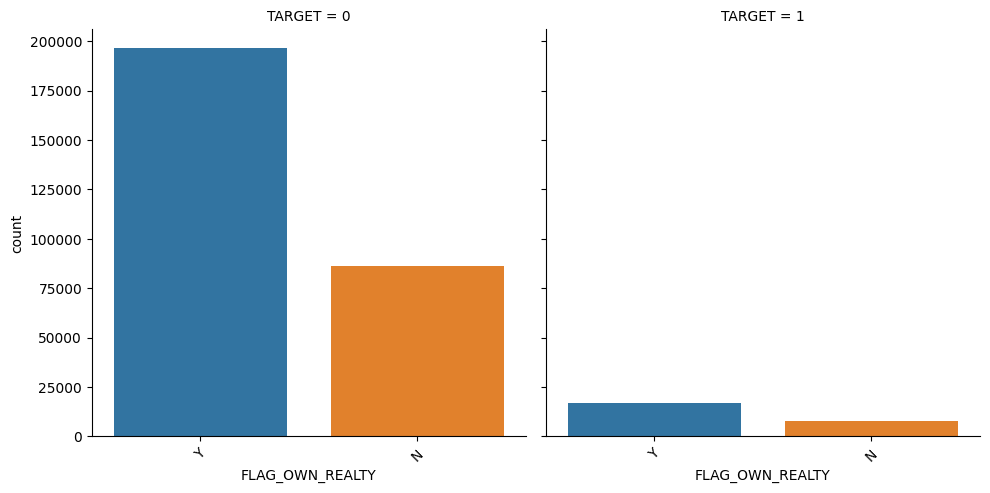

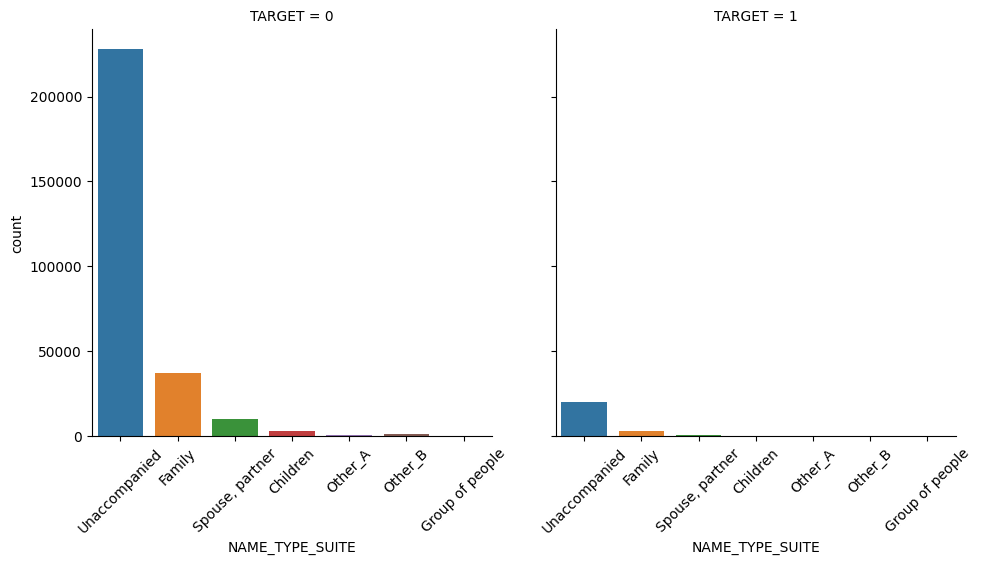

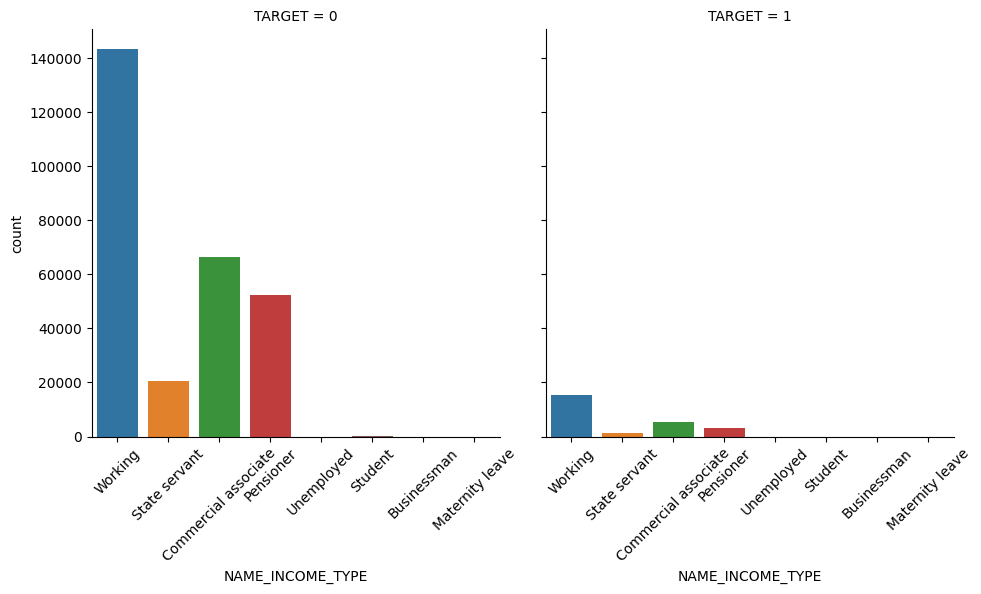

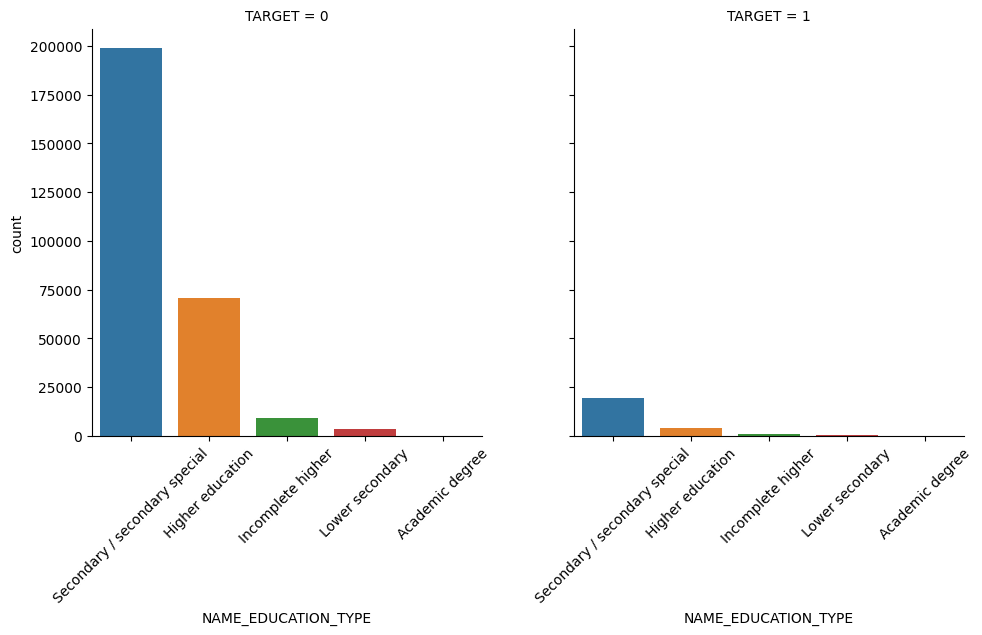

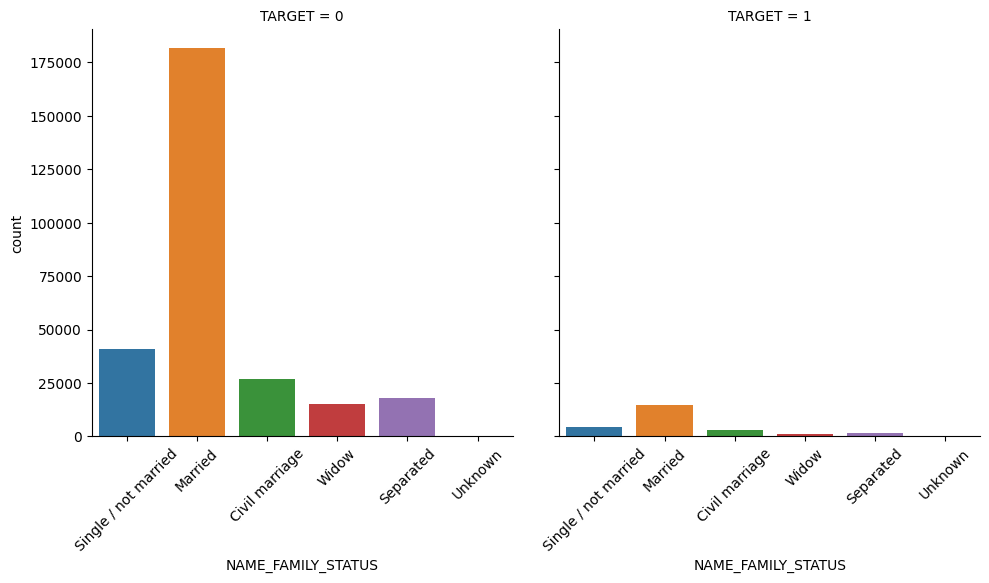

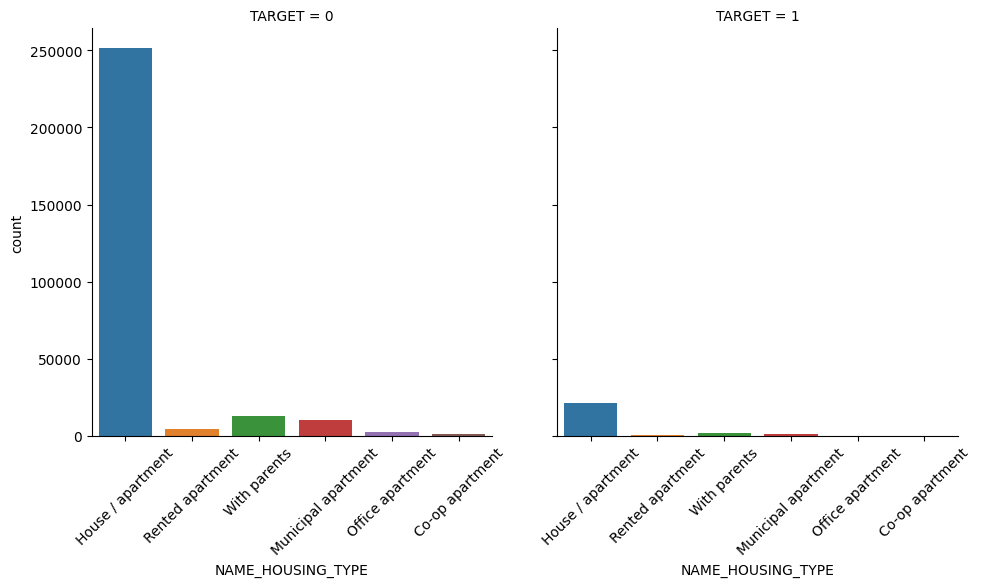

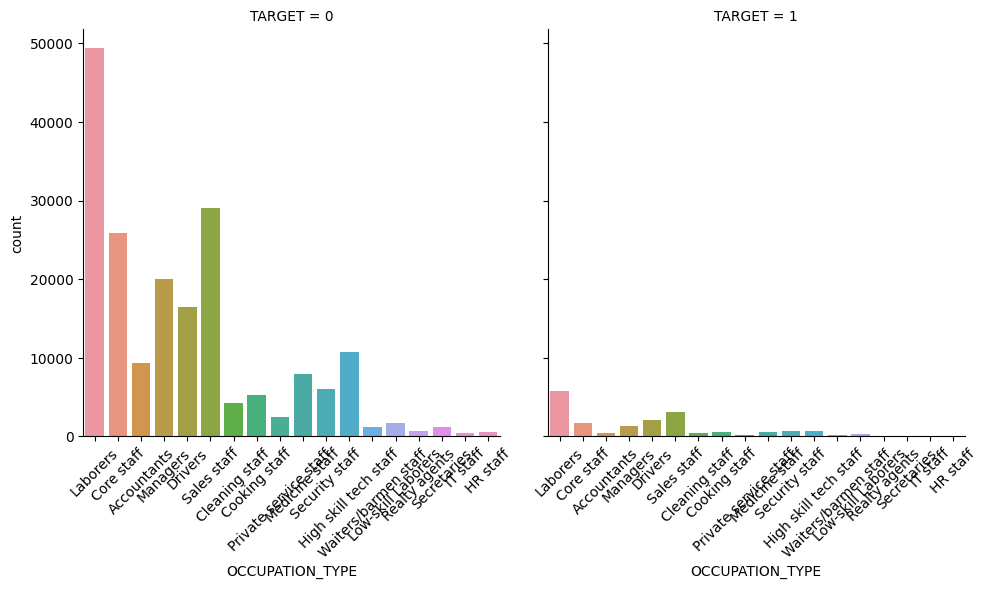

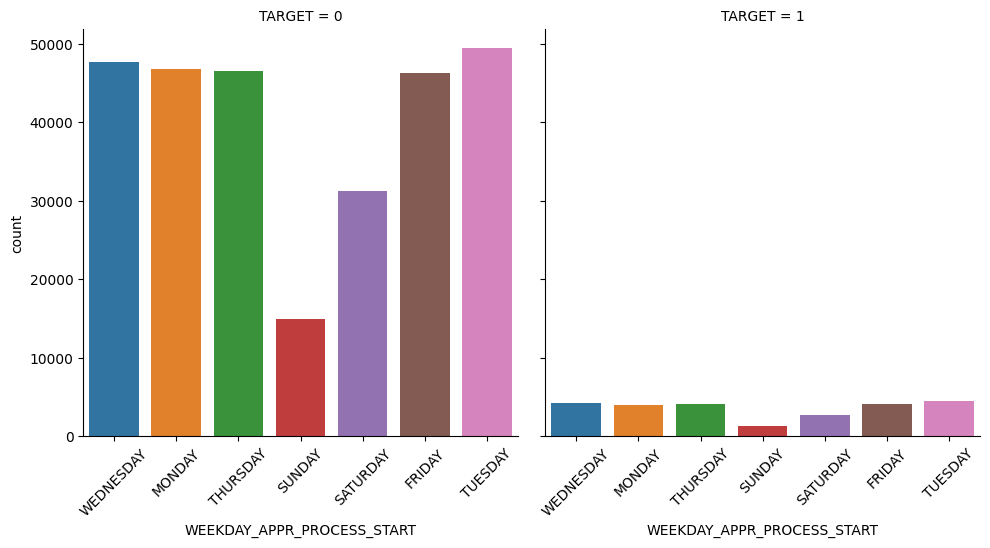

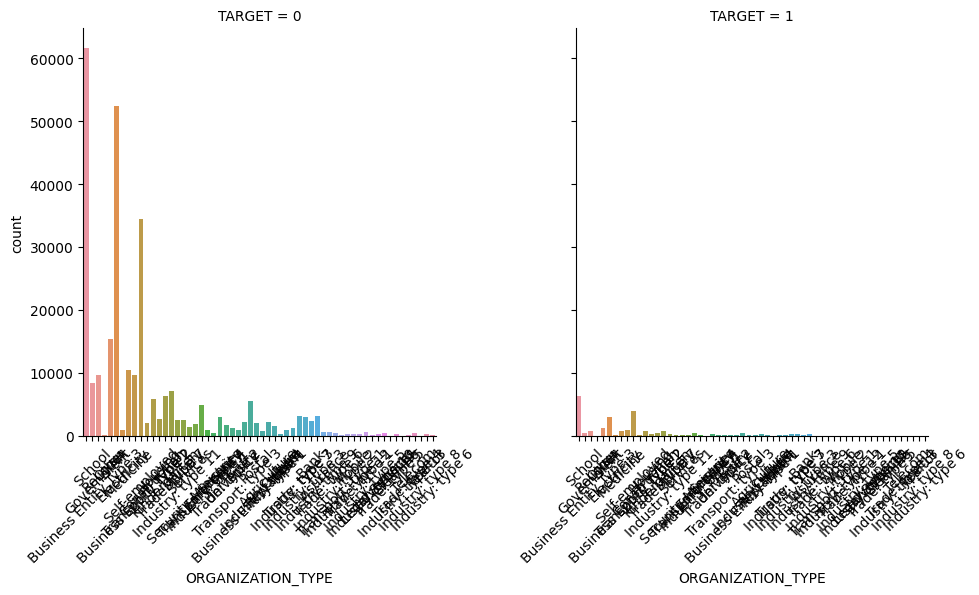

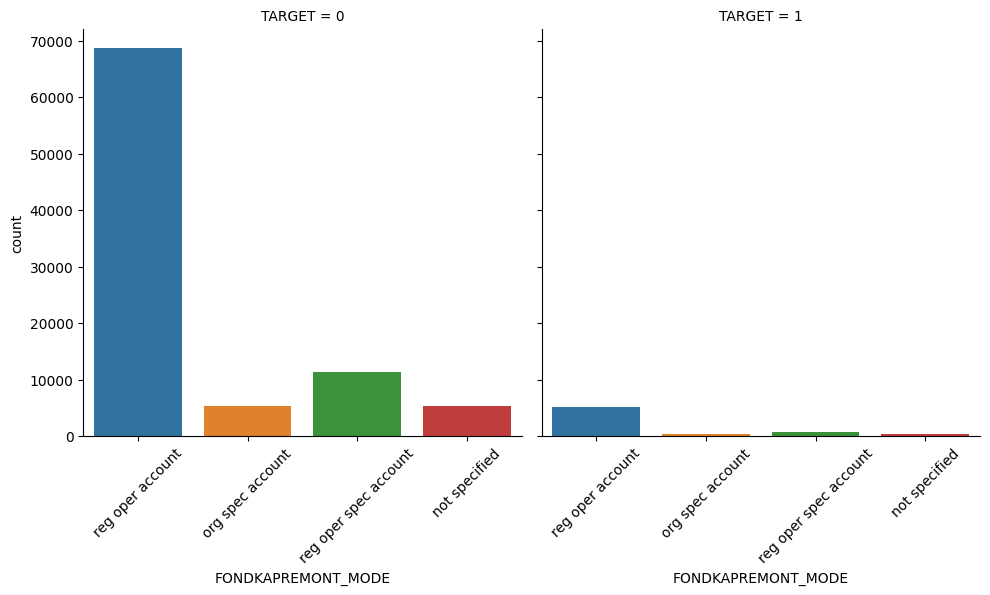

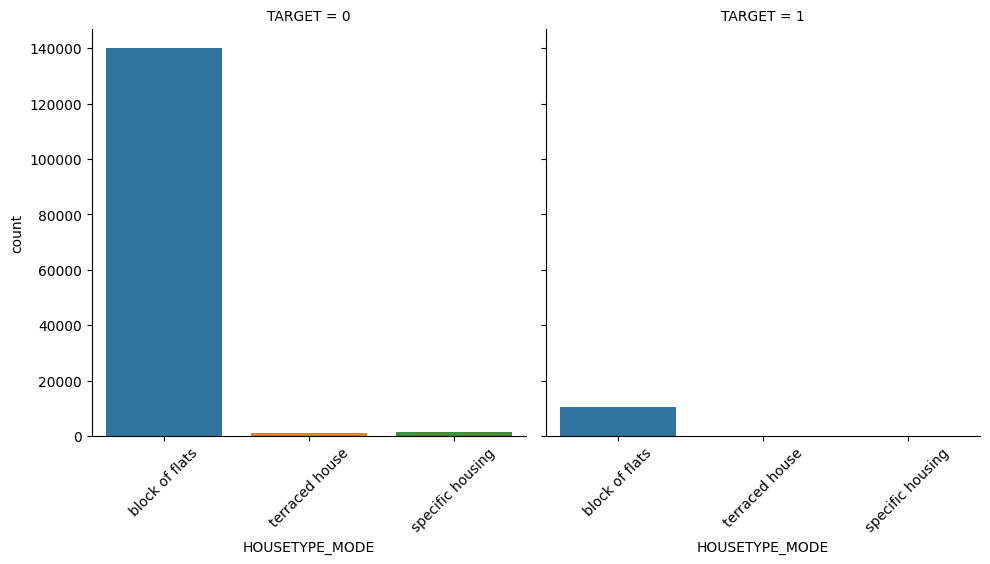

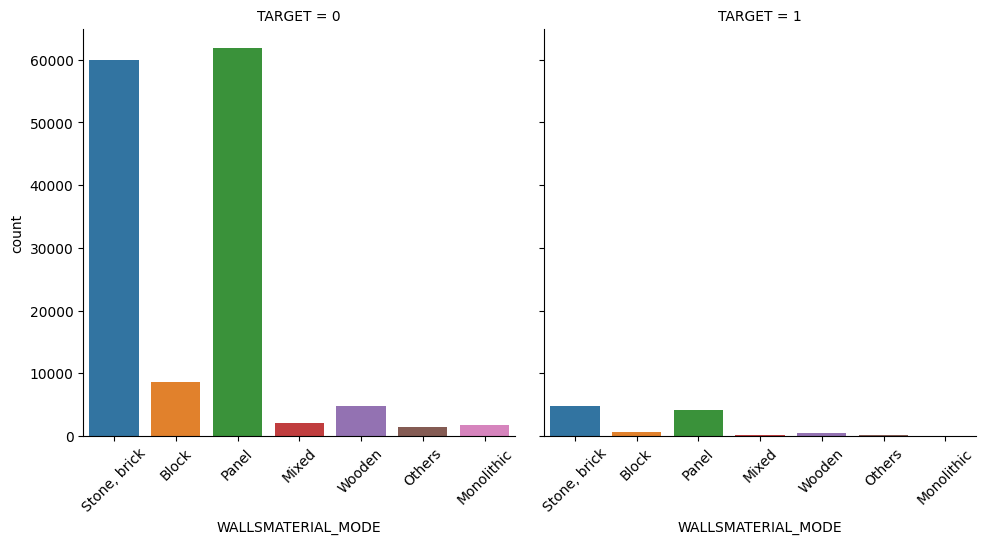

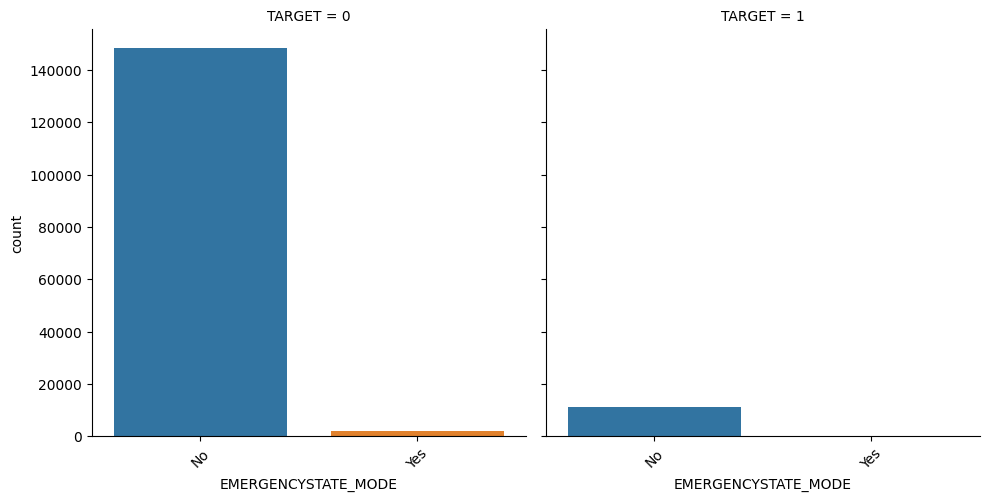

In [28]:
def show_cat_by_target(df, columns):
    for col in columns:
        print('column name:', col)
        chart = sns.catplot(x=col, col='TARGET', data=app_train, kind='count')
        chart.set_xticklabels(rotation=45)

show_cat_by_target(app_train, object_columns)  

#### 대출 횟수 대비 연체 비율이 남성이 여성보다 높음. 이를 value_counts로 확인하기

In [29]:
cond_0 = (app_train['TARGET'] == 0)
cond_1 = (app_train['TARGET'] == 1)

print(app_train['CODE_GENDER'].value_counts()/app_train.shape[0])
print(app_train[cond_0]['CODE_GENDER'].value_counts()/app_train[cond_0].shape[0])
print(app_train[cond_1]['CODE_GENDER'].value_counts()/app_train[cond_1].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64
F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64


#### 주요 칼럼들의 target과의 상관도 분석 및 heatmap 시각화

In [30]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']
col_corr = app_train[corr_columns].corr()
col_corr

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,TARGET
EXT_SOURCE_1,1.000000,0.213982,0.186846,-0.600610,0.168429,0.119398,0.175502,0.289848,-0.132375,-0.181095,-0.132607,0.026232,-0.155317
EXT_SOURCE_2,0.213982,1.000000,0.109167,-0.091996,0.131228,0.125804,0.139367,-0.020767,-0.050955,-0.059913,-0.195764,0.060925,-0.160472
EXT_SOURCE_3,0.186846,0.109167,1.000000,-0.205478,0.043516,0.030752,0.047717,0.113434,-0.131597,-0.107549,-0.075256,-0.030229,-0.178919
DAYS_BIRTH,-0.600610,-0.091996,-0.205478,1.000000,-0.055436,0.009445,-0.053442,-0.615864,0.272691,0.331912,0.082939,0.027261,0.078239
AMT_CREDIT,0.168429,0.131228,0.043516,-0.055436,1.000000,0.770138,0.986968,-0.066838,-0.006575,0.009621,-0.073701,0.156870,-0.030369
AMT_ANNUITY,0.119398,0.125804,0.030752,0.009445,0.770138,1.000000,0.775109,-0.104332,0.011268,0.038514,-0.063747,0.191657,-0.012817
AMT_GOODS_PRICE,0.175502,0.139367,0.047717,-0.053442,0.986968,0.775109,1.000000,-0.064842,-0.009267,0.011565,-0.076313,0.159610,-0.039645
DAYS_EMPLOYED,0.289848,-0.020767,0.113434,-0.615864,-0.066838,-0.104332,-0.064842,1.000000,-0.272378,-0.210242,0.023032,-0.064223,-0.044932
DAYS_ID_PUBLISH,-0.132375,-0.050955,-0.131597,0.272691,-0.006575,0.011268,-0.009267,-0.272378,1.000000,0.101896,0.088576,0.008506,0.051457
DAYS_REGISTRATION,-0.181095,-0.059913,-0.107549,0.331912,0.009621,0.038514,0.011565,-0.210242,0.101896,1.000000,0.056983,0.027805,0.041975


<AxesSubplot: >

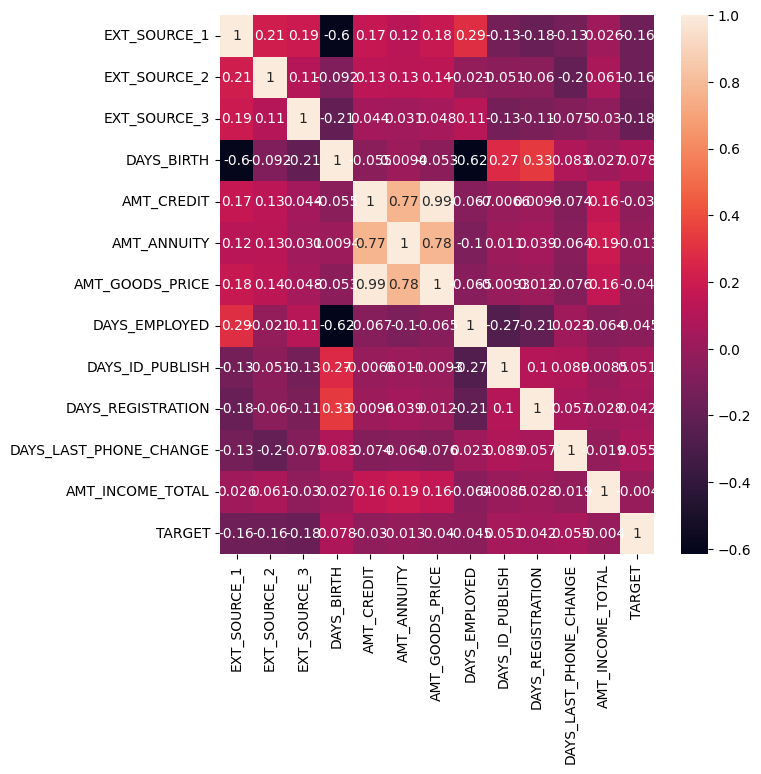

In [32]:
# heatmap 시각화하기
plt.figure(figsize=(7, 7))
sns.heatmap(col_corr, annot=True)

#### 이상치 데이터 처리

In [33]:
app_train['DAYS_EMPLOYED'].value_counts()
# 어떤 특정한 상황에 대해서 365243값으로 처리를 해버림 그 값이 55374개나 있는 것! 이것을 처리해주자 

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [34]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan) # lightbgm은 알아서 null값을 처리하니깐 그렇게 치환하기 
app_train['DAYS_EMPLOYED'].value_counts()

-200.0      156
-224.0      152
-199.0      151
-230.0      151
-212.0      150
           ... 
-13961.0      1
-11827.0      1
-10176.0      1
-9459.0       1
-8694.0       1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

### 주요 feature들에 대한 feature engineering
- EXT_SOURCE 계열값 확인, EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 

In [36]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum() # EXT_SOURCE는 정확히는 아니지만 어떤 신용평가 점수같다. 가장 영향을 많이 주는 feature였음

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [39]:
# 피처들의 평균, 최대, 최소, 표준편차 확인
# 이것은 각각의 칼럼 레벨에서 계산한 것
print("########### mean ###############")
print(app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print("############## max ############")
print(app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print("############ min ##############")
print(app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print("############# std #############")
print(app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

########### mean ###############
EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
############## max ############
EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
############ min ##############
EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64
############# std #############
EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


In [40]:
# app으로 한번에 합쳐주기 (app_train, app_test concat)
apps = pd.concat([app_train, app_test])

# row 레벨로 SOURCE_1, SOURCE_2, SOURCE_3를 계산하고 싶음
apps['APP_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APP_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
# apps['APP_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
# apps['APP_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [43]:
apps.iloc[:, -2:].head(10) # 맨뒤에있는 칼럼 2개 row 10개만 가져오기
# null 값이 나오는 이유는? 3개의 값을 표준편차내는 건데 값이 2개가 null이면 비교할 값이 없어서 null이 들어갈 수 밖에 없음

,APP_SOURCE_MEAN,APP_SOURCE_STD
0,0.161787,0.092026
1,0.466757,0.219895
2,0.642739,0.122792
3,0.650442,NaN
4,0.322738,NaN
5,0.487726,0.188799
6,0.663607,0.150717
7,0.627467,0.122771
8,0.514935,0.280096
9,0.746644,NaN


In [44]:
# null을 평균으로 바꿔주자!
apps['APP_SOURCE_STD']= apps['APP_SOURCE_STD'].fillna(apps['APP_SOURCE_STD'].mean())

### 비율로 새로운 feature를 만들어보자!

In [45]:
# AMT_CREDIT(대출 금액)으로 대출과 관련된 금액 추가 가공. 
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']

# AMT_INCOME_TOTAL 비율로 대출 금액 관련 피처 가공
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
# 가족수를 고려한 가처분 소득 피처 가공. 
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']

# DAYS_BIRTH, DAYS_EMPLOYED 비율로 소득/자산 관련 Feature 가공. 
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

### 데이터 레이블 인코딩, Null값은 LightGBM 내부에서 처리하도록 특별한 변경하지 않음

In [46]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

for col in object_columns:
    apps[col] = pd.factorize(apps[col])[0]

In [47]:
# train, test 다시 분리
apps_train = apps[-apps['TARGET'].isnull()] # null이 아닌 것을 -로 표시
apps_test = apps[apps['TARGET'].isnull()]
apps.shape, apps_train.shape, apps_test.shape

((356255, 136), (307511, 136), (48744, 136))

In [48]:
# 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_train['TARGET']

X, val_X, y, val_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=42)
X.shape, val_X.shape

((215257, 134), (92254, 134))

In [50]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs=-1, 
    n_estimators=1000,
    learning_rate=0.02,
    num_leaves=32,
    subsample=0.8,
    max_depth=12,
    silent=-1,
    verbose=-1
)

clf.fit(X, y, eval_set=[(X, y), (val_X, val_y)], eval_metric='auc', verbose=100,
        early_stopping_rounds=100)

[100]	training's auc: 0.760479	training's binary_logloss: 0.247392	valid_1's auc: 0.748982	valid_1's binary_logloss: 0.249483
[200]	training's auc: 0.7808	training's binary_logloss: 0.240324	valid_1's auc: 0.759725	valid_1's binary_logloss: 0.245554
[300]	training's auc: 0.795217	training's binary_logloss: 0.235696	valid_1's auc: 0.764195	valid_1's binary_logloss: 0.244119
[400]	training's auc: 0.807295	training's binary_logloss: 0.231963	valid_1's auc: 0.76587	valid_1's binary_logloss: 0.24359
[500]	training's auc: 0.817549	training's binary_logloss: 0.228705	valid_1's auc: 0.766232	valid_1's binary_logloss: 0.243443
[600]	training's auc: 0.826632	training's binary_logloss: 0.225696	valid_1's auc: 0.766706	valid_1's binary_logloss: 0.243295
[700]	training's auc: 0.835098	training's binary_logloss: 0.222834	valid_1's auc: 0.766904	valid_1's binary_logloss: 0.243186
[800]	training's auc: 0.843162	training's binary_logloss: 0.220041	valid_1's auc: 0.767027	valid_1's binary_logloss: 0.243

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

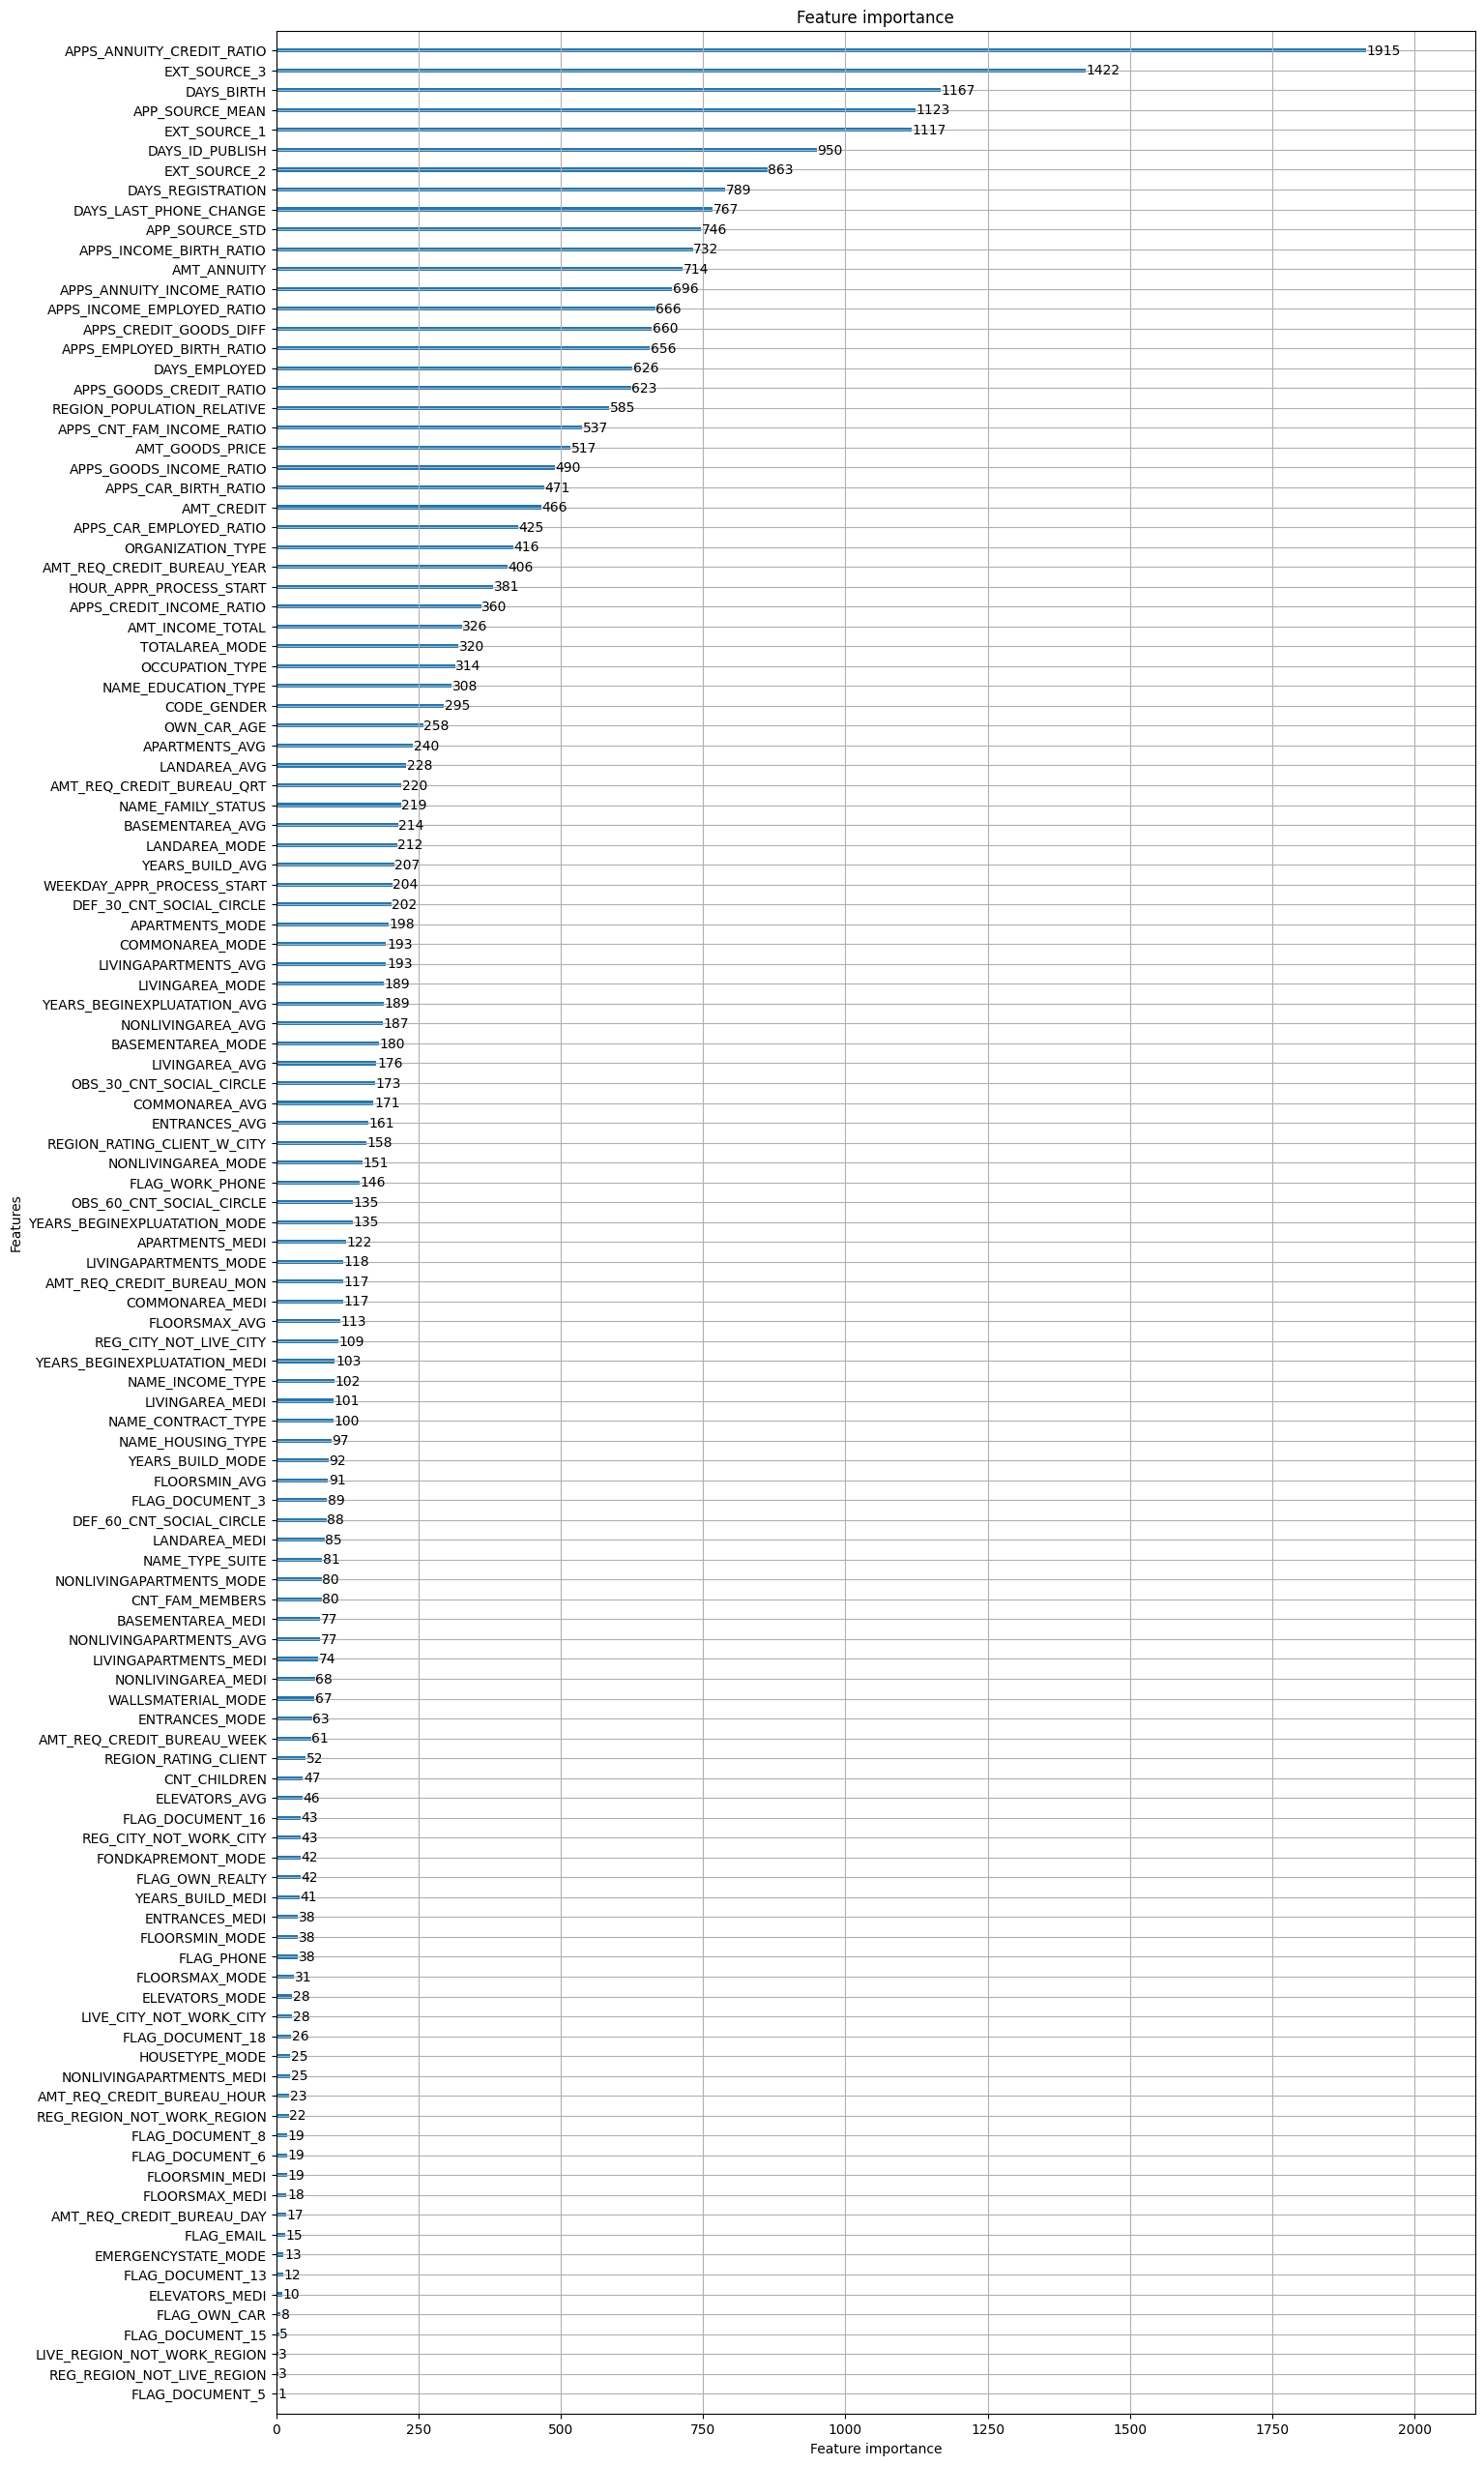

In [51]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [52]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR', 'TARGET'], axis=1))[:, 1]

In [53]:
app_test['TARGET'] = preds
app_test[['SK_ID_CURR', 'TARGET']].to_csv('app_baseline_02.csv', index=False)